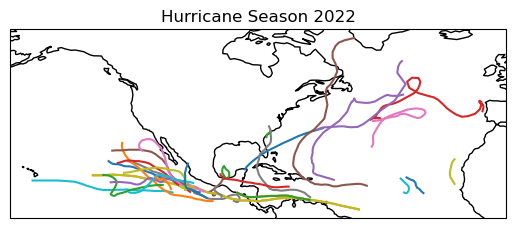

In [22]:
from clouddrift.datasets import hurdat2
from clouddrift.ragged import subset, rowsize_to_index
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

year = 2022
ds = hurdat2(basin="atlantic")
ds = subset(
    ds,
    {"time": (np.datetime64(f"{year}-01-01"), np.datetime64(f"{year}-12-31"))},
    row_dim_name="traj",
)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
idx = rowsize_to_index(ds.rowsize)
for i in range(0, len(idx) - 1):
    sl = slice(idx[i], idx[i + 1])
    ax.plot(ds.lon[sl], ds.lat[sl])

ax.set_title(f"Hurricane Season {year}")
ax.coastlines()